<a href="https://colab.research.google.com/github/aaravpanchal/EDA-on-Airbnb-NYC-2019-Database/blob/main/EDA_AIRBNB_NYC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [2]:
#importing libraries for our analysis
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [3]:
#lets load the data
from google.colab import drive
drive.mount('/content/drive')

airbnb_df=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')


Mounted at /content/drive


In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
airbnb_df[airbnb_df["price"]<100].shape

(21877, 16)

DATA WRANGLING

In [4]:
#removing duplicates
newdf=airbnb_df.drop_duplicates()
#replacing missing values 
newdf.fillna({'reviews_per_month':0}, inplace=True)
#removing uneccesorry columns
newdf.drop(['id','host_id','last_review'],axis=1, inplace=True)
#replacing zero values of price with mean of price
newdf[newdf["price"]==0]=newdf["price"].mean()

In [ ]:
#lets check our new df
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  float64
 8   minimum_nights                  48895 non-null  float64
 9   number_of_reviews               48895 non-null  float64
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  float64
 12  availability_365                

In [ ]:
newdf.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.754148,-73.901181,152.755045,7.062663,23.301113,1.124913,7.177379,112.788484
std,1.680484,3.399846,240.143242,20.625976,44.588604,2.778835,33.024726,131.613827
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723090,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763135,-73.936265,175.000000,5.000000,24.000000,1.585000,2.000000,227.000000
max,152.720687,152.720687,10000.000000,1250.000000,629.000000,152.720687,327.000000,365.000000


In [5]:
print(newdf["neighbourhood_group"].unique())
newdf.drop(newdf[newdf["neighbourhood_group"]==152.7206871868289].index,inplace=True)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx' 152.7206871868289]


In [5]:
newdf["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

DATA VISUALIZATION
Now our Data is clean and ready to be used for some deep analysis using data visualization 

lets check the number of bookings in different neighboorhood groups

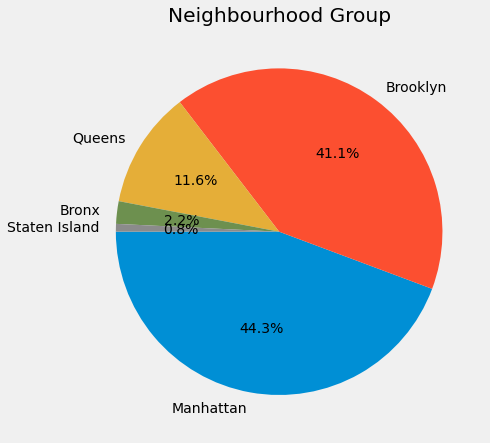

In [9]:
#price vs bookings 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(newdf.neighbourhood_group.value_counts(), labels=newdf.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

Here we can see that most number of listing are in Manhattan and Brooklyn followed by Queens, Staten Island and Bronx

Now lets check the room types in each neighbourhood groups

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


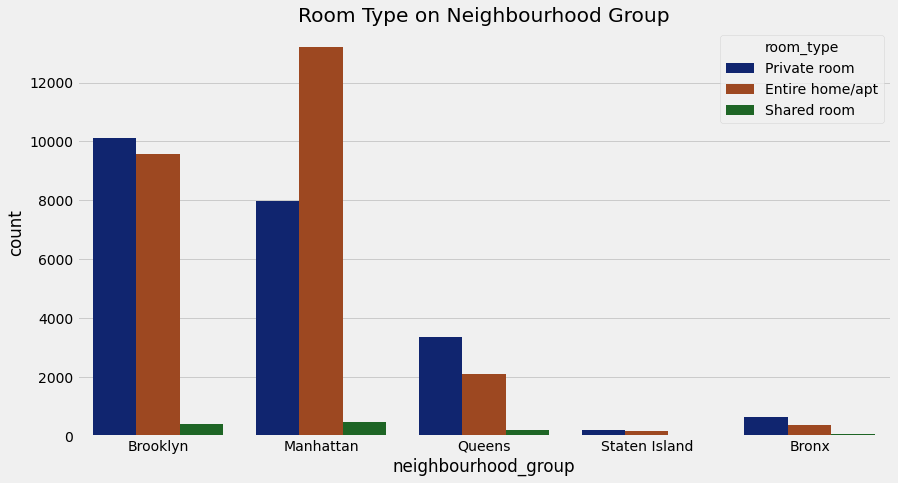

In [29]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(newdf.neighbourhood_group,hue=newdf.room_type, palette="dark")
plt.show()

Here we can see Only in Manhattan Entire Rooms are 40% more than other room types.

It was about listings basic information, now lets relove around some important factors that comes in mind while booking a room. 

Now lets find out the Average price of Rooms in each neighbourhood groups 

Text(0.5, 0, 'Neighbourhood Groups')

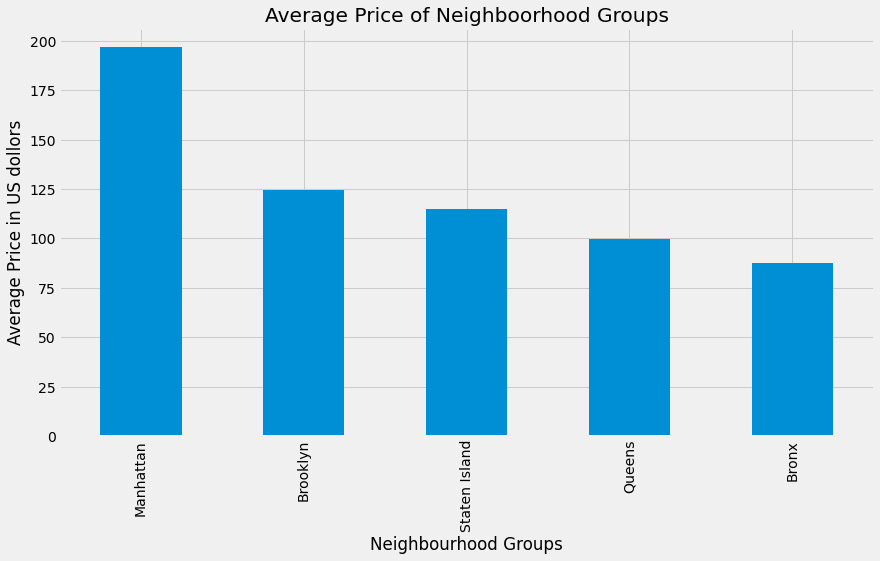

In [36]:
#top priced neighboorhoods
newdf.groupby("neighbourhood_group").price.mean().sort_values(ascending=False).plot.bar(figsize=(13,7),fontsize=14)
plt.title("Average Price of Neighboorhood Groups")
plt.ylabel("Average Price in US dollors")
plt.xlabel("Neighbourhood Groups")

Here we can see, that Manhatten holds the maximum average price despite of having maximum number of bookings

Now lets check the map view

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


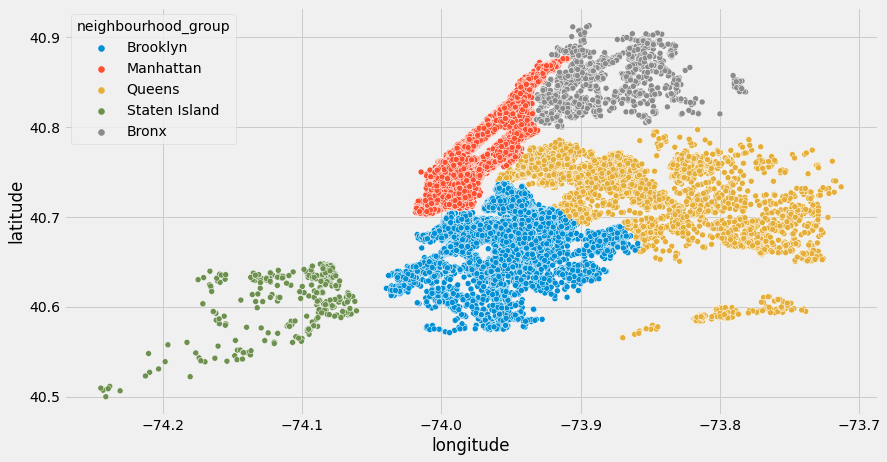

In [37]:
plt.figure(figsize=(13,7))
sns.scatterplot(newdf.longitude,newdf.latitude,hue=newdf.neighbourhood_group)

Here we can clearly see that Manhatten has very high density of listing where as Staten Island has the lowest

Manhattend holds the maximum average price but lets check top neighbourhoods indivisually

Text(0.5, 0, 'Neighbourhood Group,Neighbourhood')

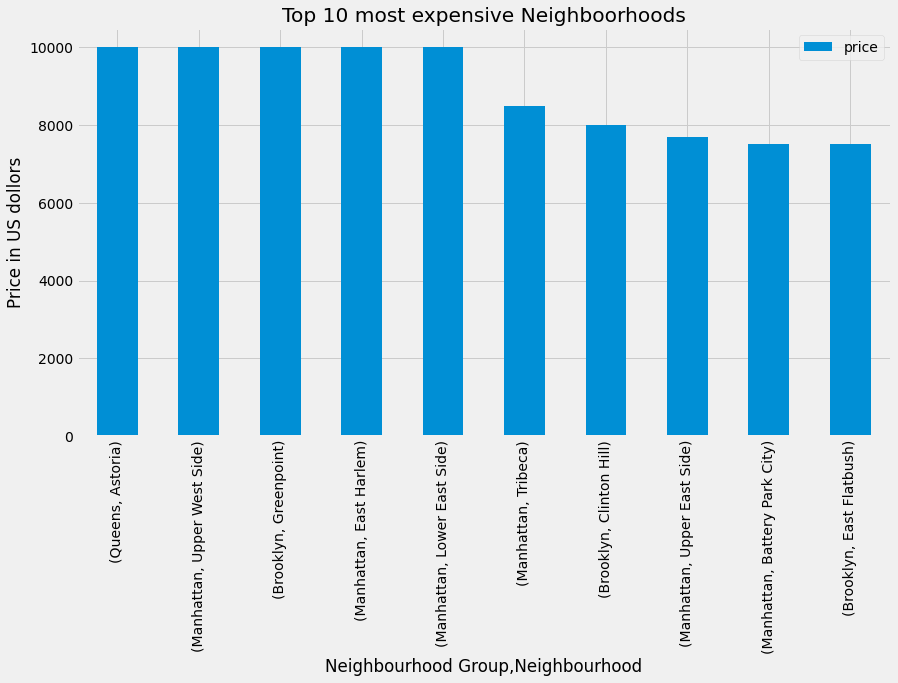

In [35]:
#top 5 neighbourhoods
newdf.groupby(['neighbourhood_group','neighbourhood']).agg({'price':'max'}).sort_values("price", ascending=False).head(10).plot.bar(figsize=(13,7),fontsize=14)
plt.title("Top 10 most expensive Neighboorhoods")
plt.ylabel("Price in US dollors")
plt.xlabel("Neighbourhood Group,Neighbourhood")

Here we can see, that Manhatten holds 50% of top 10 listing followed by brooklyn and interestingly despite of very less number of listings in Queens, it holds the most expesive place to stay.

It was about pricing, but is it all about pricing, ofcourse not! So what does come in our mind while booking, we see the reviews and the host to maximize our comfort and convinience.

Now lets find out most reviewed listings hosts with their availibilty in the year

Text(0.5, 0, 'Number of Reviews/Month')

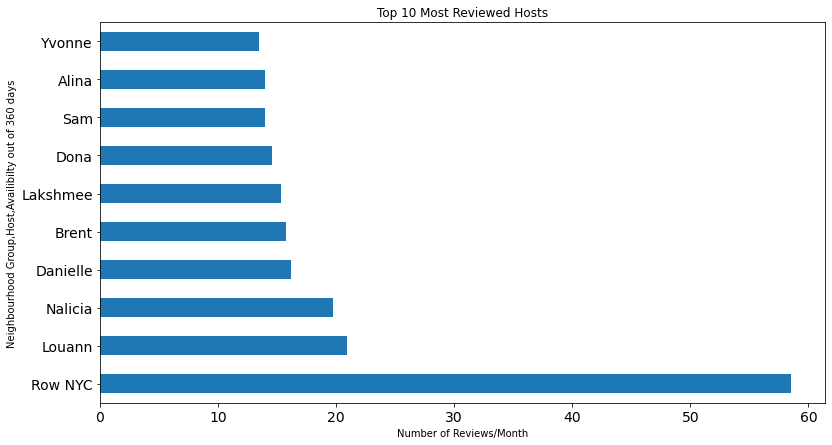

In [30]:
top_host=newdf.groupby(["neighbourhood_group","host_name","availability_365"]).reviews_per_month.max().sort_values(ascending=False).head(10).plot.barh(figsize=(13,7),fontsize=14)
plt.title("Top 10 Most Reviewed Hosts")
plt.ylabel("Neighbourhood Group,Host,Availibilty out of 360 days")
plt.xlabel("Number of Reviews/Month")

Here we can see that

In [25]:
top_host

neighbourhood_group  host_name  availability_365
Manhattan            Row NYC    299.0               58.50
Queens               Louann     134.0               20.94
                     Nalicia    26.0                19.75
                                25.0                17.82
                     Danielle   341.0               16.22
Name: reviews_per_month, dtype: float64